# Problem Statement: Regression and AI model in car price analysis.

In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [56]:
df = pd.read_csv("/Users/jyotiyadav/Downloads/car_dataset_india_with_location.csv")

In [58]:
df.head()

,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost,City,State
0,1,Toyota,Innova,2024,CNG,Manual,2020000.0,27.3,800,4,24100.0,Pune,Maharashtra
1,2,Kia,EV6,2023,Diesel,Manual,1770000.0,16.4,2500,7,18800.0,Mumbai,Maharashtra
2,3,Maruti Suzuki,Dzire,2016,Petrol,Manual,3430000.0,17.6,2000,6,24700.0,Chennai,Tamil Nadu
3,4,Honda,Amaze,2019,Petrol,Manual,1610000.0,19.2,2500,6,23300.0,Delhi,Delhi
4,5,Honda,City,2015,Electric,Manual,1840000.0,15.8,1000,5,5800.0,Pune,Maharashtra


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_ID            10000 non-null  int64  
 1   Brand             10000 non-null  object 
 2   Model             10000 non-null  object 
 3   Year              10000 non-null  int64  
 4   Fuel_Type         10000 non-null  object 
 5   Transmission      10000 non-null  object 
 6   Price             10000 non-null  float64
 7   Mileage           10000 non-null  float64
 8   Engine_CC         10000 non-null  int64  
 9   Seating_Capacity  10000 non-null  int64  
 10  Service_Cost      10000 non-null  float64
 11  City              10000 non-null  object 
 12  State             10000 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [62]:
df.isnull().sum()

Car_ID              0
Brand               0
Model               0
Year                0
Fuel_Type           0
Transmission        0
Price               0
Mileage             0
Engine_CC           0
Seating_Capacity    0
Service_Cost        0
City                0
State               0
dtype: int64

In [64]:
df.describe()

,Car_ID,Year,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2019.543800,1.946064e+06,19.967300,1542.070000,5.515400,14969.130000
std,2886.89568,2.877553,8.837945e+05,5.778583,557.487394,1.121556,5777.753741
min,1.00000,2015.000000,4.000000e+05,10.000000,800.000000,4.000000,5000.000000
25%,2500.75000,2017.000000,1.180000e+06,14.900000,1000.000000,5.000000,9900.000000
50%,5000.50000,2020.000000,1.950000e+06,20.000000,1500.000000,6.000000,15000.000000
75%,7500.25000,2022.000000,2.700000e+06,25.000000,2000.000000,7.000000,20000.000000
max,10000.00000,2024.000000,3.500000e+06,30.000000,2500.000000,7.000000,25000.000000


# Data visualization

## Vehicle Price Distributuion

Text(0, 0.5, 'Count')

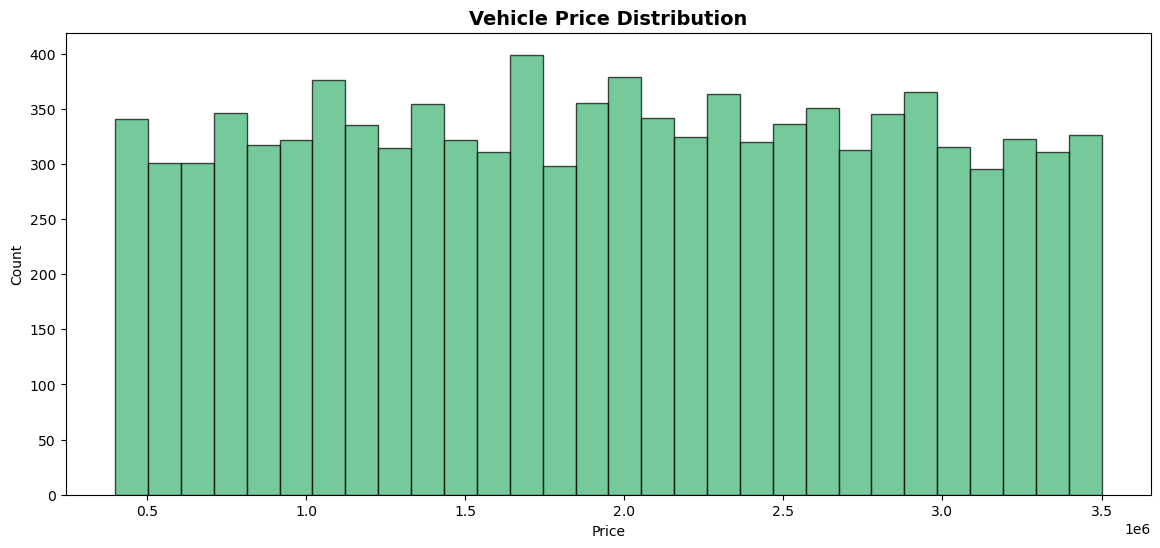

In [68]:
plt.figure(figsize=(14, 6))

# Histogram: Vehicle Price Distribution
plt.hist(df["Price"], bins=30, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.title("Vehicle Price Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Price")
plt.ylabel("Count")


In [70]:
# Top 10 most expensive cars
top_cars = df[['Brand', 'Price']].sort_values(by='Price', ascending=False).head(10)
print(top_cars)


              Brand      Price
9079  Maruti Suzuki  3500000.0
7147     Volkswagen  3500000.0
6173          Skoda  3500000.0
3754            Kia  3500000.0
7943         Toyota  3500000.0
900   Maruti Suzuki  3500000.0
8486        Renault  3500000.0
4043        Renault  3500000.0
7526     Volkswagen  3500000.0
1152        Hyundai  3500000.0


## Top 10 brands by frequency

/var/folders/ts/39nzw2j165gffbcw6cjjf44m0000gn/T/ipykernel_23662/2410740446.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='pastel')


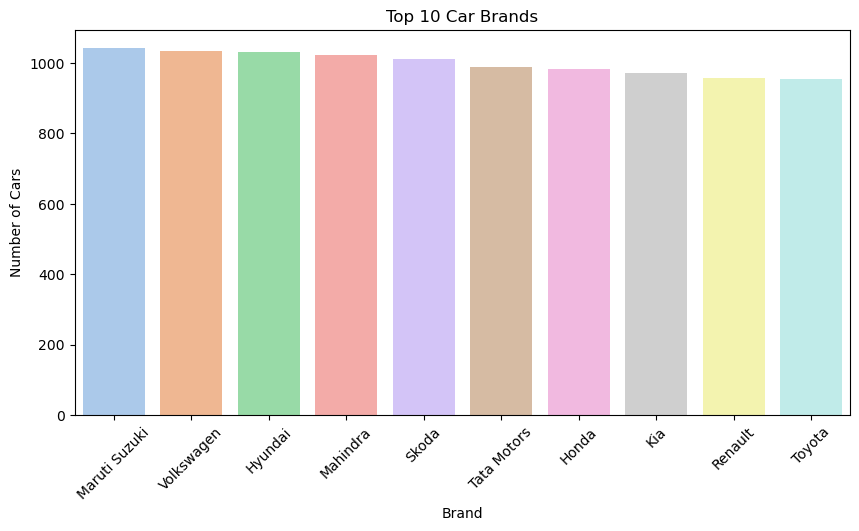

In [73]:
#  Top 10 Brands by Frequency
top_brands = df['Brand'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='pastel')
plt.title('Top 10 Car Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

In [75]:
# Interpretation :
# Maruti Suzuki, Hyundai, and Volkswagen are the most represented brands.
# These brands dominate the Indian market due to affordability, after-sales service, and resale value.

## Number of Vehicles Per Year

/var/folders/ts/39nzw2j165gffbcw6cjjf44m0000gn/T/ipykernel_23662/4183049284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Year", palette="crest")


Text(0.5, 1.0, 'Number of Vehicles Per Year')

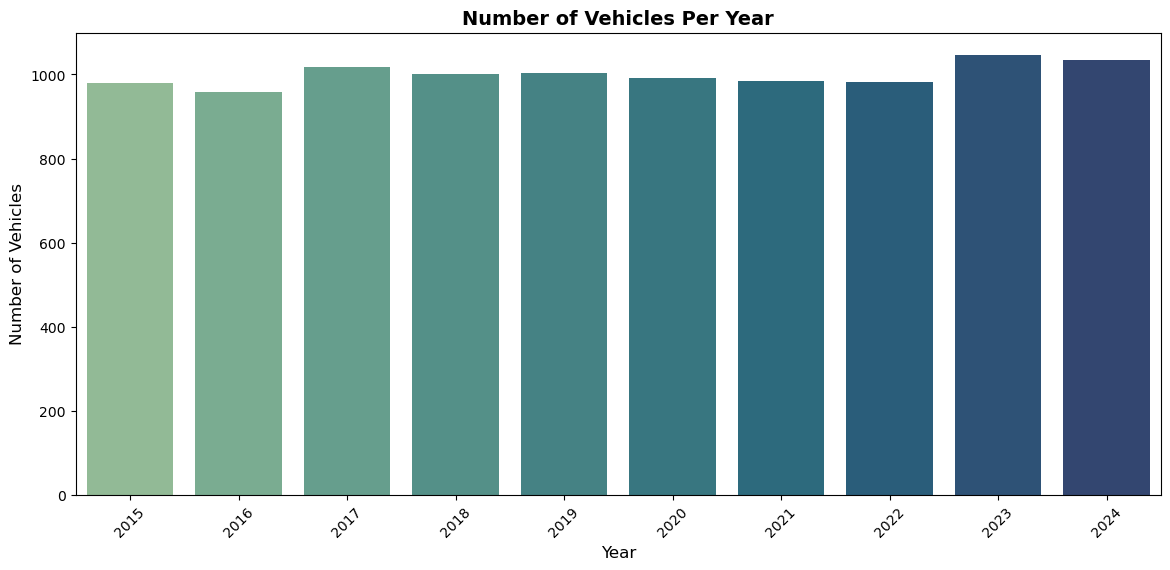

In [78]:
plt.figure(figsize=(14, 6))

# Bar Chart: Number of Vehicles Per Year
sns.countplot(data=df, x="Year", palette="crest")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Vehicles", fontsize=12)
plt.xticks(rotation=45)
plt.title("Number of Vehicles Per Year", fontsize=14, fontweight='bold')


In [80]:
# Interpretation :
# we can interpret that most of the cars are manufactured in the year 2023.

## Fuel Type Distribution

/var/folders/ts/39nzw2j165gffbcw6cjjf44m0000gn/T/ipykernel_23662/3113389790.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Fuel_Type", palette="Set2", order=df["Fuel_Type"].value_counts().index)


Text(0.5, 1.0, 'Fuel Type Distribution')

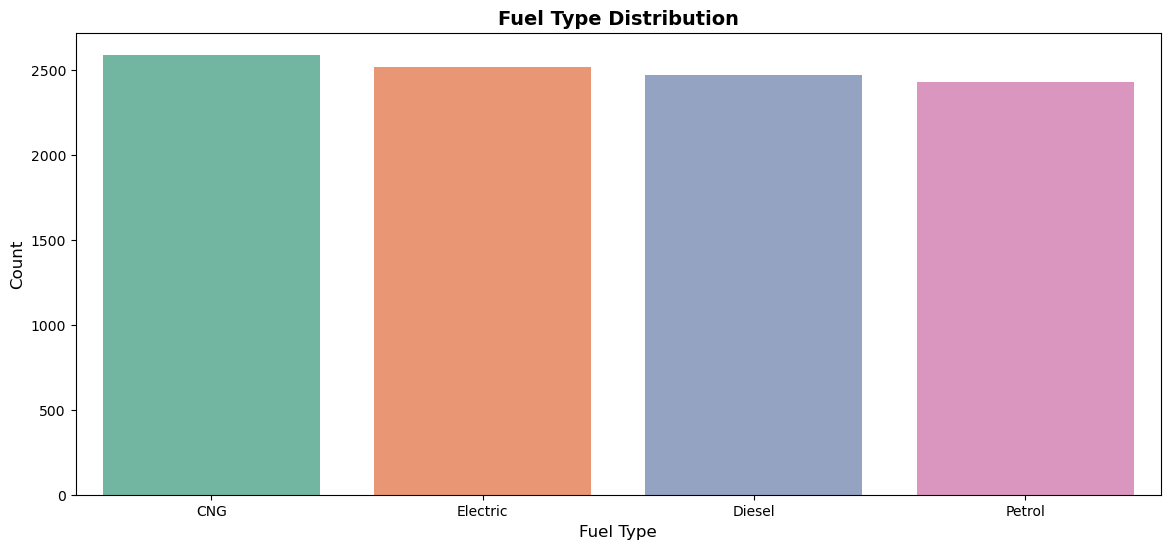

In [83]:
plt.figure(figsize=(14, 6))

# Count Plot: Fuel Type Distribution
sns.countplot(data=df, x="Fuel_Type", palette="Set2", order=df["Fuel_Type"].value_counts().index)
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Fuel Type Distribution", fontsize=14, fontweight='bold')


In [85]:
# Interpretation :
# CNG cars have the highest count (~2600).
# Electric cars are the second most common, slightly below CNG.
# Indicates strong availability or preference for CNG vehicles, possibly due to lower fuel cost and urban pollution norms.

## Mileage Distribution

Text(0.5, 1.0, 'Mileage Distribution')

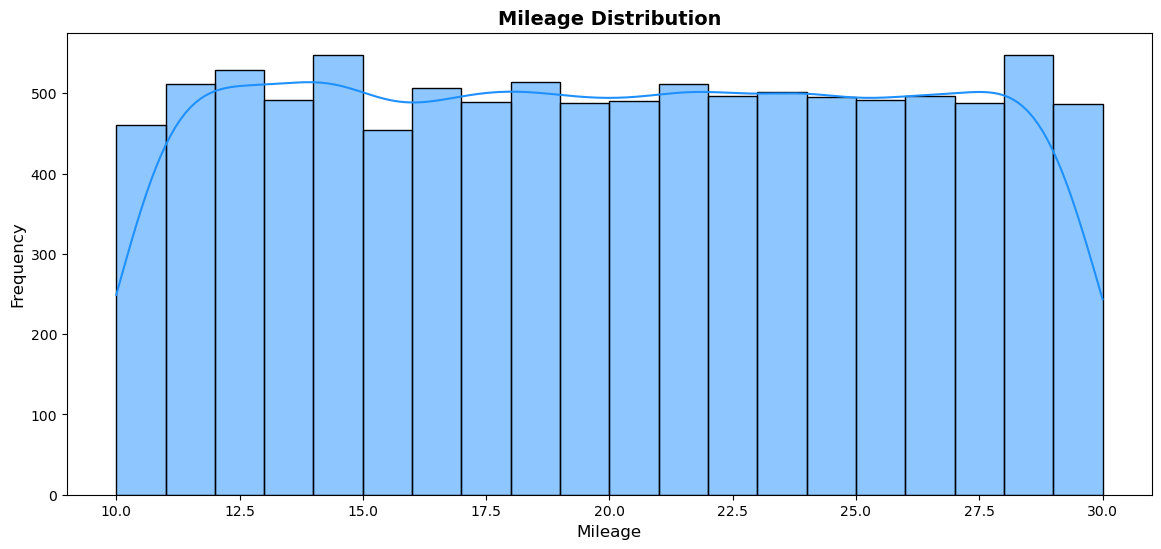

In [88]:
plt.figure(figsize=(14, 6))

# Histogram: Mileage Distribution
sns.histplot(data=df, x="Mileage", bins=20, kde=True, color="dodgerblue", edgecolor="black")
plt.xlabel("Mileage", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Mileage Distribution", fontsize=14, fontweight='bold')


In [90]:
# Interpretation:
# The majority of vehicles have mileage between 10 km/l and 30 km/l.
# Very few vehicles lie outside this range, indicating a tight, practical mileage spread.
# Many compact cars or hybrids (especially CNG or small petrol cars) are designed to give high mileage around 28–30 km/l.

/var/folders/ts/39nzw2j165gffbcw6cjjf44m0000gn/T/ipykernel_23662/2697864306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Year", y="Price", palette="Pastel1")


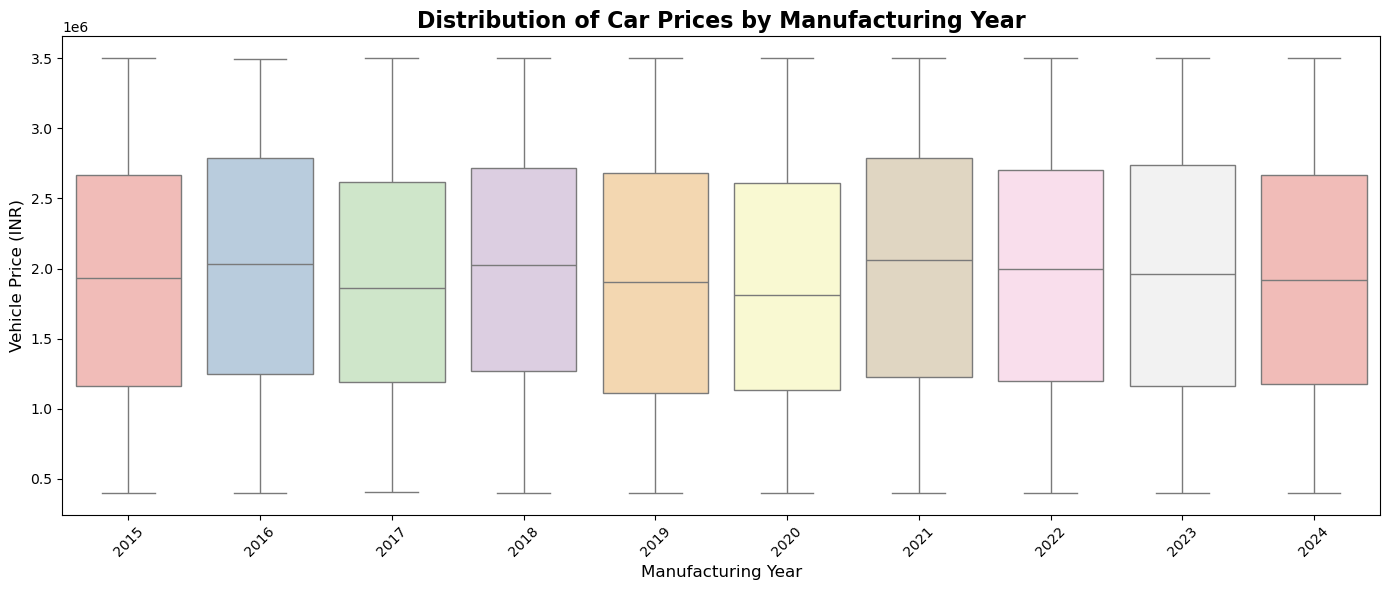

In [92]:
plt.figure(figsize=(14, 6))

# Create boxplot: Year vs. Price
sns.boxplot(data=df, x="Year", y="Price", palette="Pastel1")

# Enhance plot labels and aesthetics
plt.xlabel("Manufacturing Year", fontsize=12)
plt.ylabel("Vehicle Price (INR)", fontsize=12)
plt.title("Distribution of Car Prices by Manufacturing Year", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [94]:
df[df["Year"].isin([2016, 2021])].sort_values("Price", ascending=False).head(10)

,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost,City,State
5822,5823,Skoda,Kushaq,2021,Petrol,Automatic,3500000.0,16.9,2000,6,21100.0,Lucknow,Uttar Pradesh
8778,8779,Volkswagen,Virtus,2021,CNG,Automatic,3500000.0,10.9,1000,4,17700.0,Ahmedabad,Gujarat
461,462,Renault,Lodgy,2016,CNG,Manual,3490000.0,17.6,1000,4,6600.0,Ahmedabad,Gujarat
2927,2928,Maruti Suzuki,Swift,2021,Electric,Automatic,3490000.0,14.4,1800,4,13900.0,Chennai,Tamil Nadu
523,524,Tata Motors,Altroz,2016,Diesel,Automatic,3490000.0,11.7,1200,4,23500.0,Delhi,Delhi
5343,5344,Honda,Civic,2016,Diesel,Manual,3490000.0,29.7,1800,4,18800.0,Hyderabad,Telangana
9207,9208,Kia,Carnival,2016,Diesel,Automatic,3490000.0,17.1,1500,4,8600.0,Pune,Maharashtra
4576,4577,Honda,Jazz,2021,CNG,Automatic,3490000.0,15.3,800,7,9200.0,Hyderabad,Telangana
6860,6861,Volkswagen,Vento,2021,Petrol,Manual,3490000.0,14.7,1200,5,21000.0,Hyderabad,Telangana
6208,6209,Maruti Suzuki,WagonR,2016,CNG,Automatic,3490000.0,16.6,2000,5,22600.0,Chennai,Tamil Nadu


In [96]:
# Interpretation:
# 2016 Peak: In April 2017, India transitioned from BS-III to stricter BS-IV emission standards.
# Many buyers in 2016 may have preferred purchasing BS-IV-compliant cars before the deadline, increasing demand (and prices) for newer models.
# 2021 Peak: After COVID-19 lockdowns (2020), pent-up demand and preference for private transport over public led to a sales boom in 2021.

## Service Cost Distribution

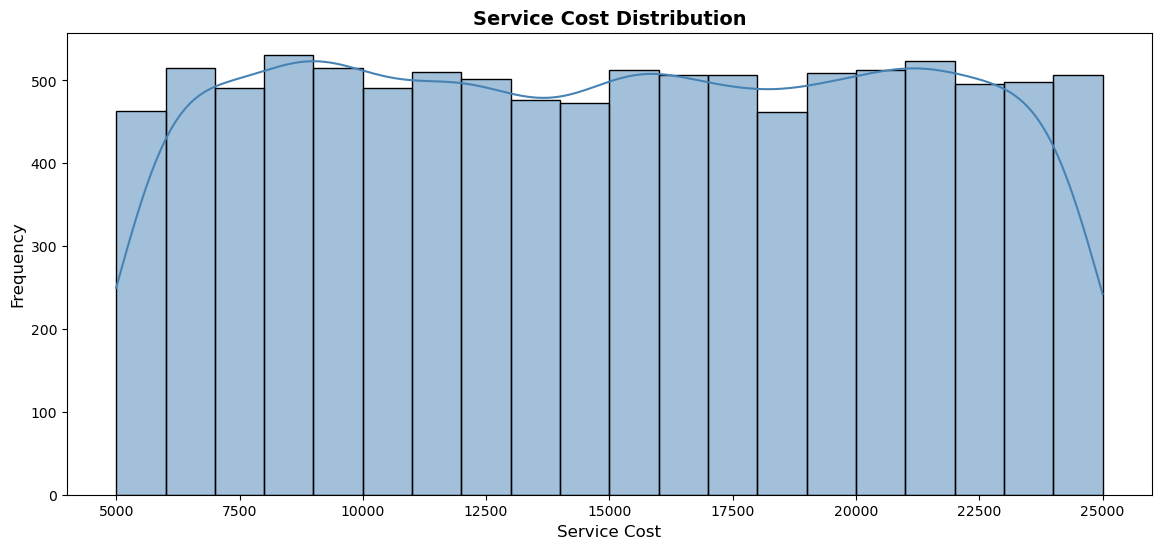

In [99]:
plt.figure(figsize=(14, 6))

# Histogram: Service Cost Distribution
sns.histplot(data=df, x="Service_Cost", bins=20, kde=True, color="steelblue", edgecolor="black")
plt.xlabel("Service Cost", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Service Cost Distribution", fontsize=14, fontweight='bold')

plt.show()


In [101]:
# Interpretation :
# This graph reveals that most services are affordable, but a small fraction are expensive, likely tied to complex repairs or premium cars. The right skew emphasizes the importance of preventive maintenance to avoid the high-cost tail.
# The tallest bar represents the most frequent service cost range.

## Price Boxplot by state

/var/folders/ts/39nzw2j165gffbcw6cjjf44m0000gn/T/ipykernel_23662/4232816728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


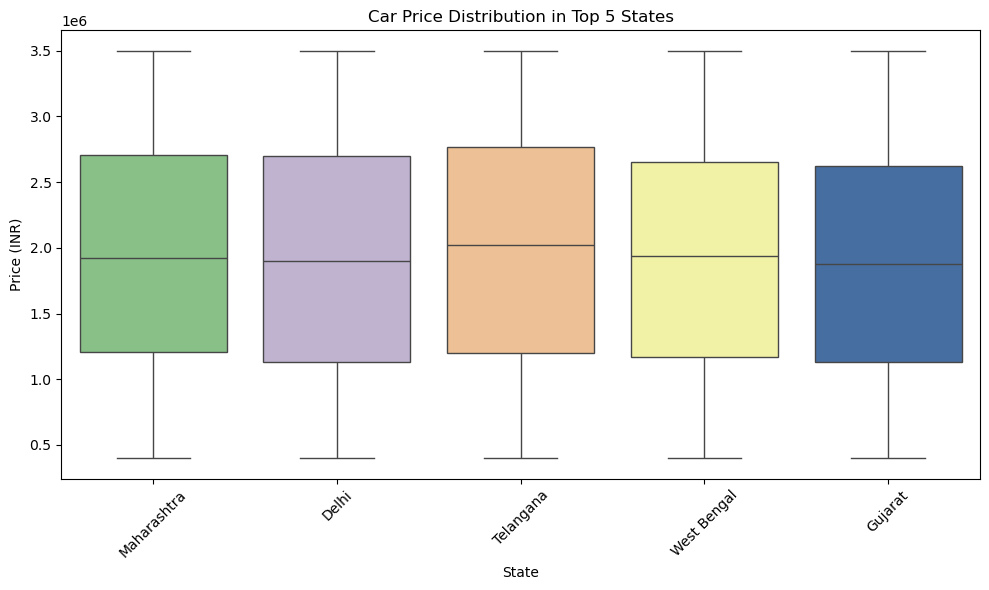

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- pick the 5 states with the most transactions ---
top_states = df['State'].value_counts().nlargest(5).index

# --- draw the box-and-whisker plot ---
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df[df['State'].isin(top_states)],
    x='State',
    y='Price',
    palette='Accent'
)

plt.title('Car Price Distribution in Top 5 States')
plt.xlabel('State')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)   # turn labels for easier reading
plt.tight_layout()
plt.show()


In [106]:
# interpretation:
# Maharashtra , Telangana and Delhi show wide price ranges.
# Other states have more consistent pricing.

## Correlation heatmap

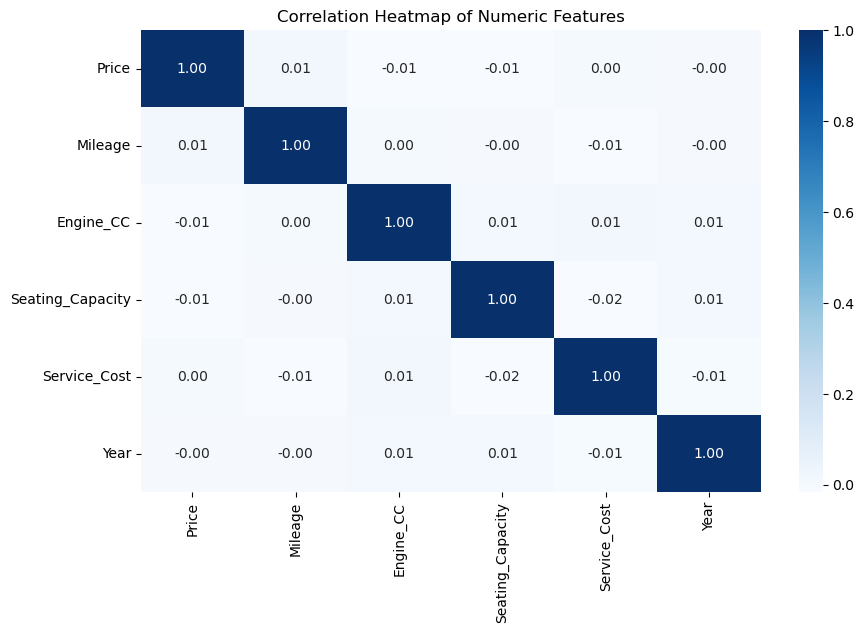

In [109]:
#  Correlation Heatmap for Numeric Features
numerical_cols = ['Price', 'Mileage', 'Engine_CC', 'Seating_Capacity', 'Service_Cost', 'Year']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [111]:
# Interpretation of correlation heatmap :
# +1 → perfect positive linear correlation (as one increases, the other increases)
# 0 → no linear correlation
# -1 → perfect negative linear correlation (as one increases, the other decreases)
# Mileage: Near-zero correlation (0.01), suggesting mileage has almost no linear impact on price.
# Engine_CC: Near-zero negative correlation (-0.01), implying engine size doesn't linearly influence price.
# Seating_Capacity: Near-zero negative correlation (-0.01), showing no meaningful relationship with price.
# Service_Cost and Year: Both have near-zero correlations with price (0.00 and -0.00, respectively).
#The dataset shows no strong linear relationships between the numeric features. This implies:
# Price is not linearly influenced by the other features in this analysis.
# Features like mileage, engine size, and seating capacity are independent of each other in terms of linear dependence.

# Some algorithms 

## Importing some important libraries for modelling

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, silhouette_score
import time

## KNN AND NAIVE BAYES :

In [20]:

# Load the dataset
df = pd.read_csv("/Users/jyotiyadav/Downloads/car_dataset_india_with_location.csv")

# Handle missing values if any
df = df.dropna()

# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)


# Classification Part (KNN, Naive Bayes)

# Create Price Category using qcut
df_encoded["Price_Category"] = pd.qcut(df["Price"], q=3, labels=["Low", "Medium", "High"])

# Features and target
X_class = df_encoded.drop(columns=["Mileage", "Price", "Price_Category"])
y_class = df_encoded["Price_Category"]

# Train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

# Define classification models
classification_models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate classifiers
results_classification = []
for name, model in classification_models.items():
    start_time = time.time()
    model.fit(X_train_class_scaled, y_train_class)
    y_pred = model.predict(X_test_class_scaled)
    end_time = time.time()
    accuracy = accuracy_score(y_test_class, y_pred)
    results_classification.append({
        "Model": name,
        "Accuracy": accuracy,
        "Time (s)": end_time - start_time
    })
    print(f"\n{name} Classification Report:\n", classification_report(y_test_class, y_pred))

df_results_classification = pd.DataFrame(results_classification)
print("\nClassification Results:\n", df_results_classification)




K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

        High       0.35      0.47      0.40       682
         Low       0.31      0.34      0.32       632
      Medium       0.36      0.22      0.27       686

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.33      2000
weighted avg       0.34      0.34      0.33      2000


Naive Bayes Classification Report:
               precision    recall  f1-score   support

        High       0.35      0.34      0.34       682
         Low       0.32      0.34      0.33       632
      Medium       0.37      0.37      0.37       686

    accuracy                           0.35      2000
   macro avg       0.35      0.35      0.35      2000
weighted avg       0.35      0.35      0.35      2000


Classification Results:
                  Model  Accuracy  Time (s)
0  K-Nearest Neighbors    0.3395  0.060298
1          Naive Bayes    0.3495  0.007968


In [ ]:
# n_neighbors=5: Looks at 5 nearest neighbors.
# classification_report gives precision, recall, and F1-score.
# Visualizes prediction accuracy per class.
# GaussianNB: Assumes feature values follow a normal (Gaussian) distribution.
# Standard Scaling is a method used to normalize the features in your dataset so that they have:
# Mean = 0
# Standard deviation = 1
# The formula used for standard scaling : z=x-mean/sd
# Because many machine learning algorithms are sensitive to the scale of the data, especially those that use distance metrics or assume normal distributions.


# K - MEANS CLUSTERING :

In [18]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Drop columns that shouldn't be used for clustering (like IDs or price labels)
X_cluster = df_encoded.drop(columns=["Mileage ", "Price"], errors='ignore')

# Scale the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_encoded["Cluster"] = kmeans.fit_predict(X_cluster_scaled)

# Display the first few rows with cluster labels
print(df_encoded[["Cluster"]].head())

   Cluster
0        0
1        0
2        1
3        1
4        0


In [ ]:
# StandardScaler to normalize the data.
# Drop non-numeric or label columns.
# Keep only feature columns for clustering.
#n_clusters=3: We want to group cars into 3 clusters (you can change this).
# fit_predict: Fits the model and returns the cluster label (0, 1, or 2) for each row.
# Helps analyze what each cluster represents (e.g., types of cars, price levels, etc.).

## HIERARCHICAL CLUSTERING

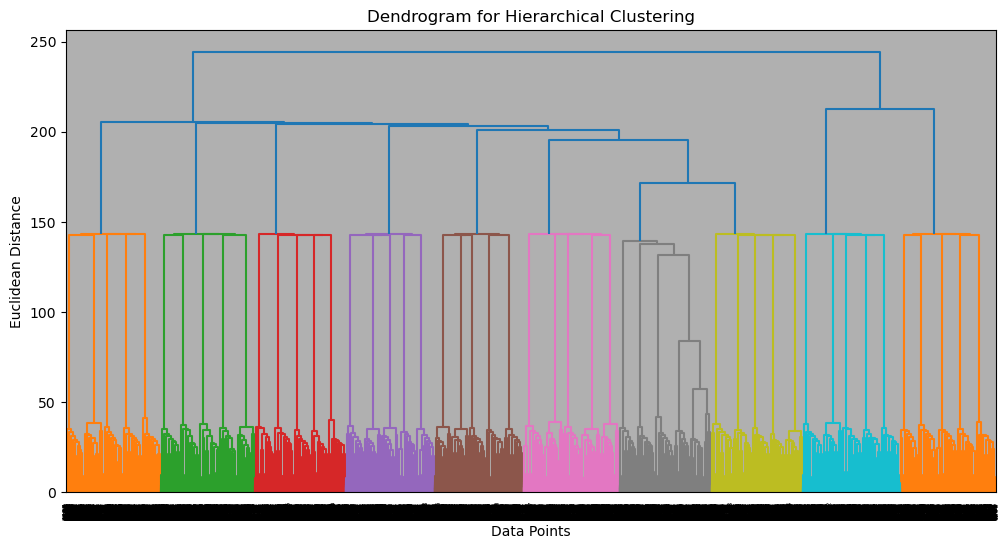

In [162]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# --- Dendrogram (for visual inspection of number of clusters) ---
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

# --- Agglomerative Clustering ---
# You can change n_clusters to your desired number
hc = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
clusters = hc.fit_predict(X_scaled)

# Add cluster label to the original dataframe
df_encoded["Cluster_HC"] = clusters



In [ ]:
# AgglomerativeClustering: This is the scikit-learn class that implements bottom-up hierarchical clustering.
# n_clusters=3: You’re asking the algorithm to group the data into 3 clusters.
# linkage='ward': Ward linkage minimizes the variance within each cluster. It's the most commonly used method for numerical data.
# Note: affinity is deprecated; when using 'ward', the distance metric is automatically 'euclidean'.
#.fit_predict(...): Fits the model on your scaled data and returns the cluster labels (i.e., which cluster each data point belongs to).
# X_scaled: This is the standardized version of your feature matrix (important for clustering so all features contribute equally).
# clusters: An array of cluster labels (e.g., [0, 2, 1, 1, 0, ...]), one for each row in X_scaled.
# x=X_scaled[:, 0]: First feature (first column of scaled data) on the x-axis.
# y=X_scaled[:, 1]: Second feature on the y-axis.
# hue=clusters: Colors each point based on its cluster label.
# df_encoded["Cluster_HC"] = Adds a new column named "Cluster_HC" to your DataFrame.
# It helps you inspect or analyze the cluster membership later (e.g., average price per cluster, etc.).


In [22]:
# Algorithms used:
# Algorithms which I used are KNN, Naïve-Bayes, K-Means and Hierarchical clustering .
# KNN is the k nearest neighbours . It is a non parametric and lazy algorithm .Lazy algorithm means no training phase needed in this algorithm . So it is simple and easy algorithm but it is restricted to high dimensional data . 
# Naïve – bayes is the Bayesian estimation of conditional probability . It uses MAP theorem to estimate the parameters and hypothesis from the most probable given data.
#      P(A/B) = P(B/A).P(A)/P(B)
# This formula is based on posterior and likelihood where posterior is equal to likelihood given evidence when prior has occurred.
# K-means clustering is clustering which clusters data of similar type in spherical shape .
# We have to predefine the value of k  and it is sensitive to ouliers .
# Hierarchical clustering is based on hierarchy which make clusters and form a tree representation of data . It is better for small data sets.

#Performance metrices used :
# Performance metrices which I used in these algorithms are Accuracy , Precision , recall, F1 score and support .
# So basically accuracy tells how accurate your data is . It is the total numer of classifies value by total value . 
# Precision is true positive by total of true positive and false positive .
# Recall is true positive by total of true positive and false negative.
# F1 score is the harmonic mean of precision and recall.
# Support tells us how often rules occur in datasets.

# Conclusion :
# Conclusions and prediction from the model :
# The variables I took are Mileage and price which categorize price into low , medium , high . so we can predict at what price there is sales boom or which brand is more compatible and mostly purchased .
# For KNN model our accuracy is coming 33% which predicts that our data is not well and variables are not linear. 
# And Support is around 680 which tells how often rules occurs in the data sets which means 680 times rules occurs in our data sets.
# In K means clustering we have 2 clusters in which data is categorized based on our variables .
# In heirachical clustering we got a hierarchy based (dendogram)cluster which clusters data based on similarity . I used agglomerative hierarchical clustering which is bottom up approach of a tree.
